In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [80]:
import networkx as nx
from graph2plan.dcel.external import fully_embed_graph
from graph2plan.dual.helpers import split_cardinal_and_interior_nodes
from graph2plan.fourtp.faces import get_external_face
from graph2plan.fourtp.tests import test_four_complete, test_co, test_external_face
from graph2plan.dcel.original import create_embedding
from graph2plan.dual.helpers import split_cardinal_and_interior_edges
from graph2plan.fourtp.faces import get_embedding_of_four_complete_G

from copy import deepcopy

from graph2plan.dual.helpers import get_embedding_faces
from graph2plan.dcel.interfaces import Edge
from graph2plan.helpers.geometry_interfaces import CoordinateList


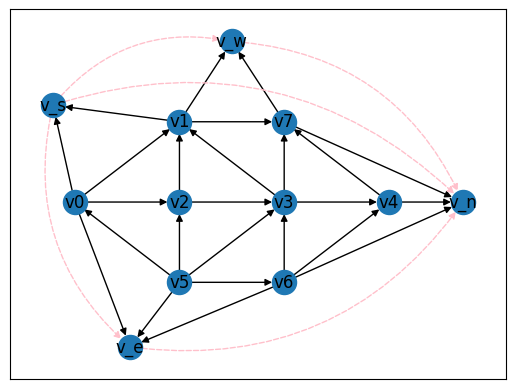

In [3]:
G, pos, full_pos =  test_four_complete()

In [84]:
CoordinateList.name_extreme_coord(full_pos)


'v_s'

In [83]:
[k for k,v in full_pos.items() if v == c.extreme_coord().pair]

['v_s']

In [72]:
G_c, faces = test_external_face()
PE = G_c.embedding

updating nbs of vertex v_s: ['v0', 'v1', 'v_w', 'v_n']
updating nbs of vertex v_e: ['v5', 'v0', 'v6', 'v_n']
v0 is potential next


In [73]:
list(PE.neighbors_cw_order("v_s"))

['v_n', 'v_w', 'v1', 'v0', 'v_e']

In [76]:
PE.traverse_face("v_s", "v_n")

['v_s', 'v_n', 'v_w']

In [77]:
PE.traverse_face("v_n", "v_s")

['v_n', 'v_s', 'v_e']

In [79]:
PE.traverse_face("v_s", "v_e")

['v_s', 'v_e', 'v_n']

In [78]:
PE.traverse_face("v_e", "v_s")

['v_e', 'v_s', 'v0']

In [63]:
PE = G_c.embedding
[i for i in PE.predecessors("v_s")]

['v0', 'v1', 'v_e', 'v_w', 'v_n']

In [64]:
[i for i in PE.successors("v_s")]

['v0', 'v_e', 'v1', 'v_n', 'v_w']

In [28]:
k = [1,2,3]
k[:2]

[1, 2]

In [ ]:
from sympy import Point, Polygon, Tri

In [32]:
from numpy import sign

In [34]:
sign(10)

np.int64(1)

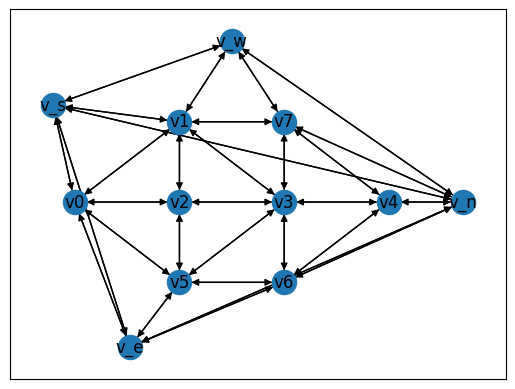

In [40]:
nx.draw_networkx(G_c.embedding.to_directed(), G_c.full_pos)

In [41]:
G_c, faces = test_external_face()

updating nbs of vertex v_s: ['v0', 'v1', 'v_w', 'v_n']
updating nbs of vertex v_e: ['v5', 'v0', 'v6', 'v_n']
v0 is potential next
Face(vertices=['v_e', 'v_n', 'v_s']), area: 1
Face(vertices=['v5', 'v0', 'v2']), area: -1
Face(vertices=['v5', 'v6', 'v_e']), area: -1
Face(vertices=['v6', 'v_n', 'v_e']), area: 1
Face(vertices=['v2', 'v1', 'v3']), area: -1
Face(vertices=['v5', 'v3', 'v6']), area: -1
Face(vertices=['v5', 'v2', 'v3']), area: -1
Face(vertices=['v0', 'v_s', 'v1']), area: -1
Face(vertices=['v6', 'v4', 'v_n']), area: -1
Face(vertices=['v7', 'v_w', 'v_n']), area: -1
Face(vertices=['v3', 'v4', 'v6']), area: -1
Face(vertices=['v0', 'v1', 'v2']), area: -1
Face(vertices=['v7', 'v_n', 'v4']), area: -1
Face(vertices=['v0', 'v_e', 'v_s']), area: 1
Face(vertices=['v3', 'v1', 'v7']), area: -1
Face(vertices=['v_s', 'v_n', 'v_w']), area: 1
Face(vertices=['v1', 'v_s', 'v_w']), area: -1
Face(vertices=['v5', 'v_e', 'v0']), area: -1
Face(vertices=['v1', 'v_w', 'v7']), area: -1
Face(vertices=['v3

In [56]:
G_c.embedding.traverse_face('v_e', 'v_n',)

['v_e', 'v_n', 'v_s']

In [55]:
list(G_c.embedding.neighbors_cw_order("v_e"))


['v_s', 'v0', 'v5', 'v6', 'v_n']

In [46]:
list(G_c.embedding.neighbors_cw_order("v_n"))

['v_s', 'v_e', 'v6', 'v4', 'v7', 'v_w']

In [43]:
G_c.embedding.traverse_face('v_n', 'v_e',)

['v_n', 'v_e', 'v6']

Face(vertices=['v5', 'v6', 'v_e'])


Edge(u='v5', v='v6', ix=0, pair_num=1)

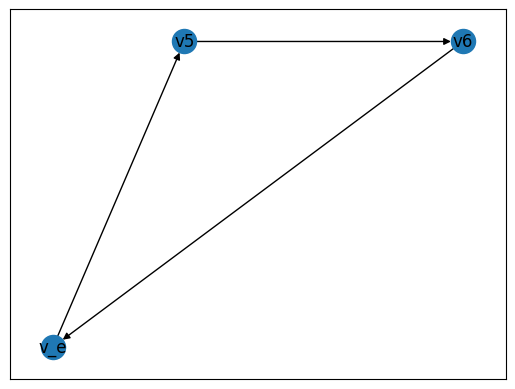

In [26]:
f1 = list(faces)[2]
print(f1)
Gcycle = nx.cycle_graph(f1.vertices, nx.DiGraph)
nx.draw_networkx(Gcycle, full_pos)
e1 = list(Gcycle.edges)[0]
e1
Edge(*e1)

In [21]:
faces

{Face(vertices=['v0', 'v1', 'v2']),
 Face(vertices=['v0', 'v_e', 'v_s']),
 Face(vertices=['v0', 'v_s', 'v1']),
 Face(vertices=['v1', 'v_s', 'v_w']),
 Face(vertices=['v1', 'v_w', 'v7']),
 Face(vertices=['v2', 'v1', 'v3']),
 Face(vertices=['v3', 'v1', 'v7']),
 Face(vertices=['v3', 'v4', 'v6']),
 Face(vertices=['v3', 'v7', 'v4']),
 Face(vertices=['v5', 'v0', 'v2']),
 Face(vertices=['v5', 'v2', 'v3']),
 Face(vertices=['v5', 'v3', 'v6']),
 Face(vertices=['v5', 'v6', 'v_e']),
 Face(vertices=['v5', 'v_e', 'v0']),
 Face(vertices=['v6', 'v4', 'v_n']),
 Face(vertices=['v6', 'v_n', 'v_e']),
 Face(vertices=['v7', 'v_n', 'v4']),
 Face(vertices=['v7', 'v_w', 'v_n']),
 Face(vertices=['v_e', 'v_n', 'v_s']),
 Face(vertices=['v_s', 'v_n', 'v_w'])}

In [ ]:
points = 

updating nbs of vertex v_s: ['v0', 'v1', 'v_w', 'v_n']
updating nbs of vertex v_e: ['v5', 'v0', 'v6', 'v_n']
v0 is potential next
-----Initialization complete---
3 12
v0 is potential next
Skipping biconnection check, >=3 vertices in Gk-1, currently have ['v_e', 'v_s']
Did not get expected number of faces. Is the embedding correct? Nodes 3, edges 3 | faces=1 != exp_faces=2
outer face: Face(vertices=['v0', 'v_s', 'v_e'])
updating nbs of vertex v0: ['v5', 'v1', 'v2']
decrementing k from 5 to 4
v5 is potential next
v1 is potential next
Multiple potential: ['v5', 'v1']. Choosing v5
outer face: Face(vertices=['v5', 'v_e', 'v0'])
updating nbs of vertex v5: ['v2', 'v3', 'v6']


Exception: Haven't handled chordal graph! 

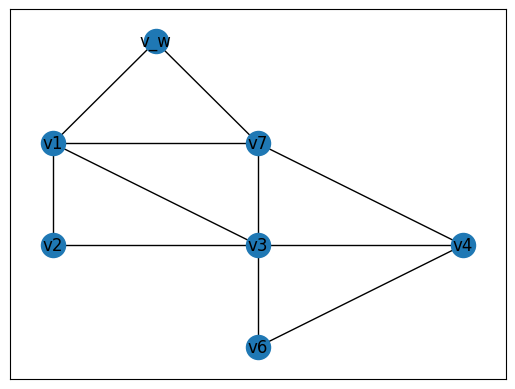

In [17]:
test_co()

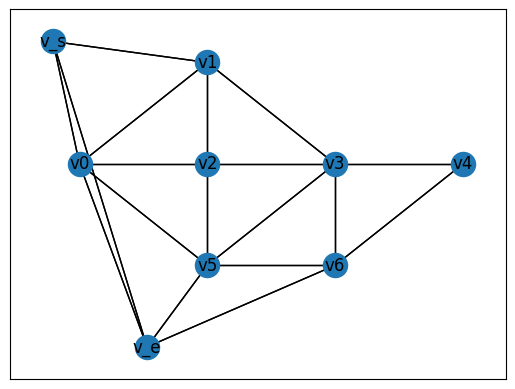

In [19]:
PE = get_embedding_of_four_complete_G(G, full_pos)
PE.remove_nodes_from(["v_w", "v_n", "v7"])

nx.draw_networkx(PE, full_pos)

In [20]:
get_embedding_faces(PE)

{Face(vertices=['v0', 'v1', 'v2']),
 Face(vertices=['v0', 'v_e', 'v_s']),
 Face(vertices=['v0', 'v_s', 'v1']),
 Face(vertices=['v2', 'v1', 'v3']),
 Face(vertices=['v3', 'v1', 'v_s', 'v_e', 'v6', 'v4']),
 Face(vertices=['v3', 'v4', 'v6']),
 Face(vertices=['v5', 'v0', 'v2']),
 Face(vertices=['v5', 'v2', 'v3']),
 Face(vertices=['v5', 'v3', 'v6']),
 Face(vertices=['v5', 'v6', 'v_e']),
 Face(vertices=['v5', 'v_e', 'v0'])}

In [21]:
test_co()

updating nbs of vertex v_n: ['v6', 'v4', 'v7', 'v_w']
decrementing k from 12 to 11
updating nbs of vertex v_w: ['v1', 'v7']
decrementing k from 11 to 10
v7 is potential next
-----Initialization complete---
v7 is potential next


AssertionError: Face: Face(vertices=['v_e', 'v_s']) has less than 3 vertices!

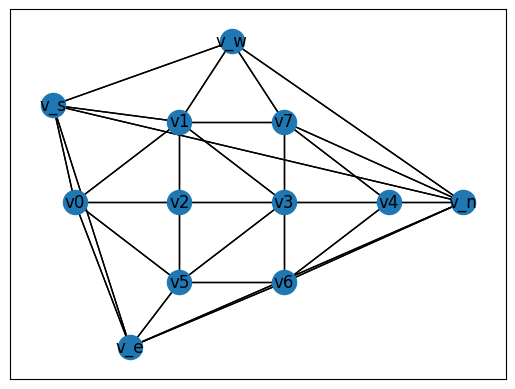

In [4]:
PE = get_embedding_of_four_complete_G(G, full_pos)
nx.draw_networkx(PE, full_pos)

In [5]:
nodes = ["v1", "v7", "v3", "v2"]
PE.remove_nodes_from(nodes)


In [6]:
PE.traverse_face("v_s", "v_w")

['v_s', 'v_w', 'v_n', 'v4', 'v6', 'v5', 'v0']

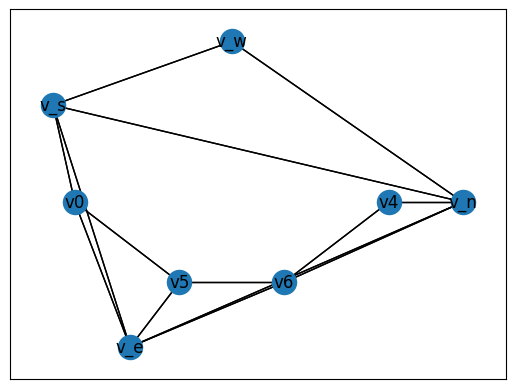

In [ ]:
n

In [28]:
PE.remove_nodes_from(nodes)

In [7]:
from graph2plan.helpers.utils import set_difference


set_difference(PE.nodes, nodes)

['v_n', 'v4', 'v_s', 'v5', 'v_w', 'v_e', 'v0', 'v6']

In [18]:
faces = get_external_face(PE)
faces
# calculate the area for all.. 

{Face(vertices=['v0', 'v1', 'v2']),
 Face(vertices=['v0', 'v_e', 'v_s']),
 Face(vertices=['v0', 'v_s', 'v1']),
 Face(vertices=['v1', 'v_s', 'v_w']),
 Face(vertices=['v1', 'v_w', 'v7']),
 Face(vertices=['v2', 'v1', 'v3']),
 Face(vertices=['v3', 'v1', 'v7']),
 Face(vertices=['v3', 'v4', 'v6']),
 Face(vertices=['v3', 'v7', 'v4']),
 Face(vertices=['v5', 'v0', 'v2']),
 Face(vertices=['v5', 'v2', 'v3']),
 Face(vertices=['v5', 'v3', 'v6']),
 Face(vertices=['v5', 'v6', 'v_e']),
 Face(vertices=['v5', 'v_e', 'v0']),
 Face(vertices=['v6', 'v4', 'v_n']),
 Face(vertices=['v6', 'v_n', 'v_e']),
 Face(vertices=['v7', 'v_n', 'v4']),
 Face(vertices=['v7', 'v_w', 'v_n']),
 Face(vertices=['v_e', 'v_n', 'v_s']),
 Face(vertices=['v_s', 'v_n', 'v_w'])}

In [23]:
sorted(faces, key=lambda x: x.get_area(full_pos), reverse=True)[0]

Face(vertices=['v_e', 'v_n', 'v_s'])

In [21]:
for face in faces:
    print(face.vertices, face.get_area(full_pos))

['v5', 'v0', 'v2'] 0.5
['v3', 'v1', 'v7'] 0.5
['v5', 'v2', 'v3'] 0.5
['v7', 'v_n', 'v4'] 0.35355339059327373
['v_e', 'v_n', 'v_s'] 5.450465965918462
['v6', 'v4', 'v_n'] 0.35355339059327373
['v0', 'v1', 'v2'] 0.5
['v3', 'v4', 'v6'] 0.5
['v0', 'v_s', 'v1'] 0.7071067811865475
['v5', 'v_e', 'v0'] 0.6380711874576983
['v1', 'v_w', 'v7'] 0.5
['v5', 'v6', 'v_e'] 0.40236892706218247
['v6', 'v_n', 'v_e'] 0.048815536468908904
['v0', 'v_e', 'v_s'] 0.13214886980224208
['v1', 'v_s', 'v_w'] 0.6553300858899106
['v5', 'v3', 'v6'] 0.5
['v_s', 'v_n', 'v_w'] 2.5821067811865475
['v2', 'v1', 'v3'] 0.5
['v3', 'v7', 'v4'] 0.5
['v7', 'v_w', 'v_n'] 0.6035533905932737
